## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Loading the Dataset

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


##  Attribute Information:

    X : x-axis spatial coordinate within the Montesinho park map: 1 to 9
    Y : y-axis spatial coordinate within the Montesinho park map: 2 to 9
    month : month of the year: ‘jan’ to ‘dec’
    day : day of the week: ‘mon’ to ‘sun’
    FFMC : FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20
    DMC : DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3
    DC : DC (Drought Code) index from the FWI system: 7.9 to 860.6
    ISI : ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10
    temp : temperature in Celsius degrees: 2.2 to 33.30
    RH : relative humidity in %: 15.0 to 100
    wind : wind speed in km/h: 0.40 to 9.40
    rain : outside rain in mm/m2 : 0.0 to 6.4
    area : the burned area of the forest (in ha): 0.00 to 1090.84

## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.shape

(517, 31)

In [7]:
df.size_category.value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

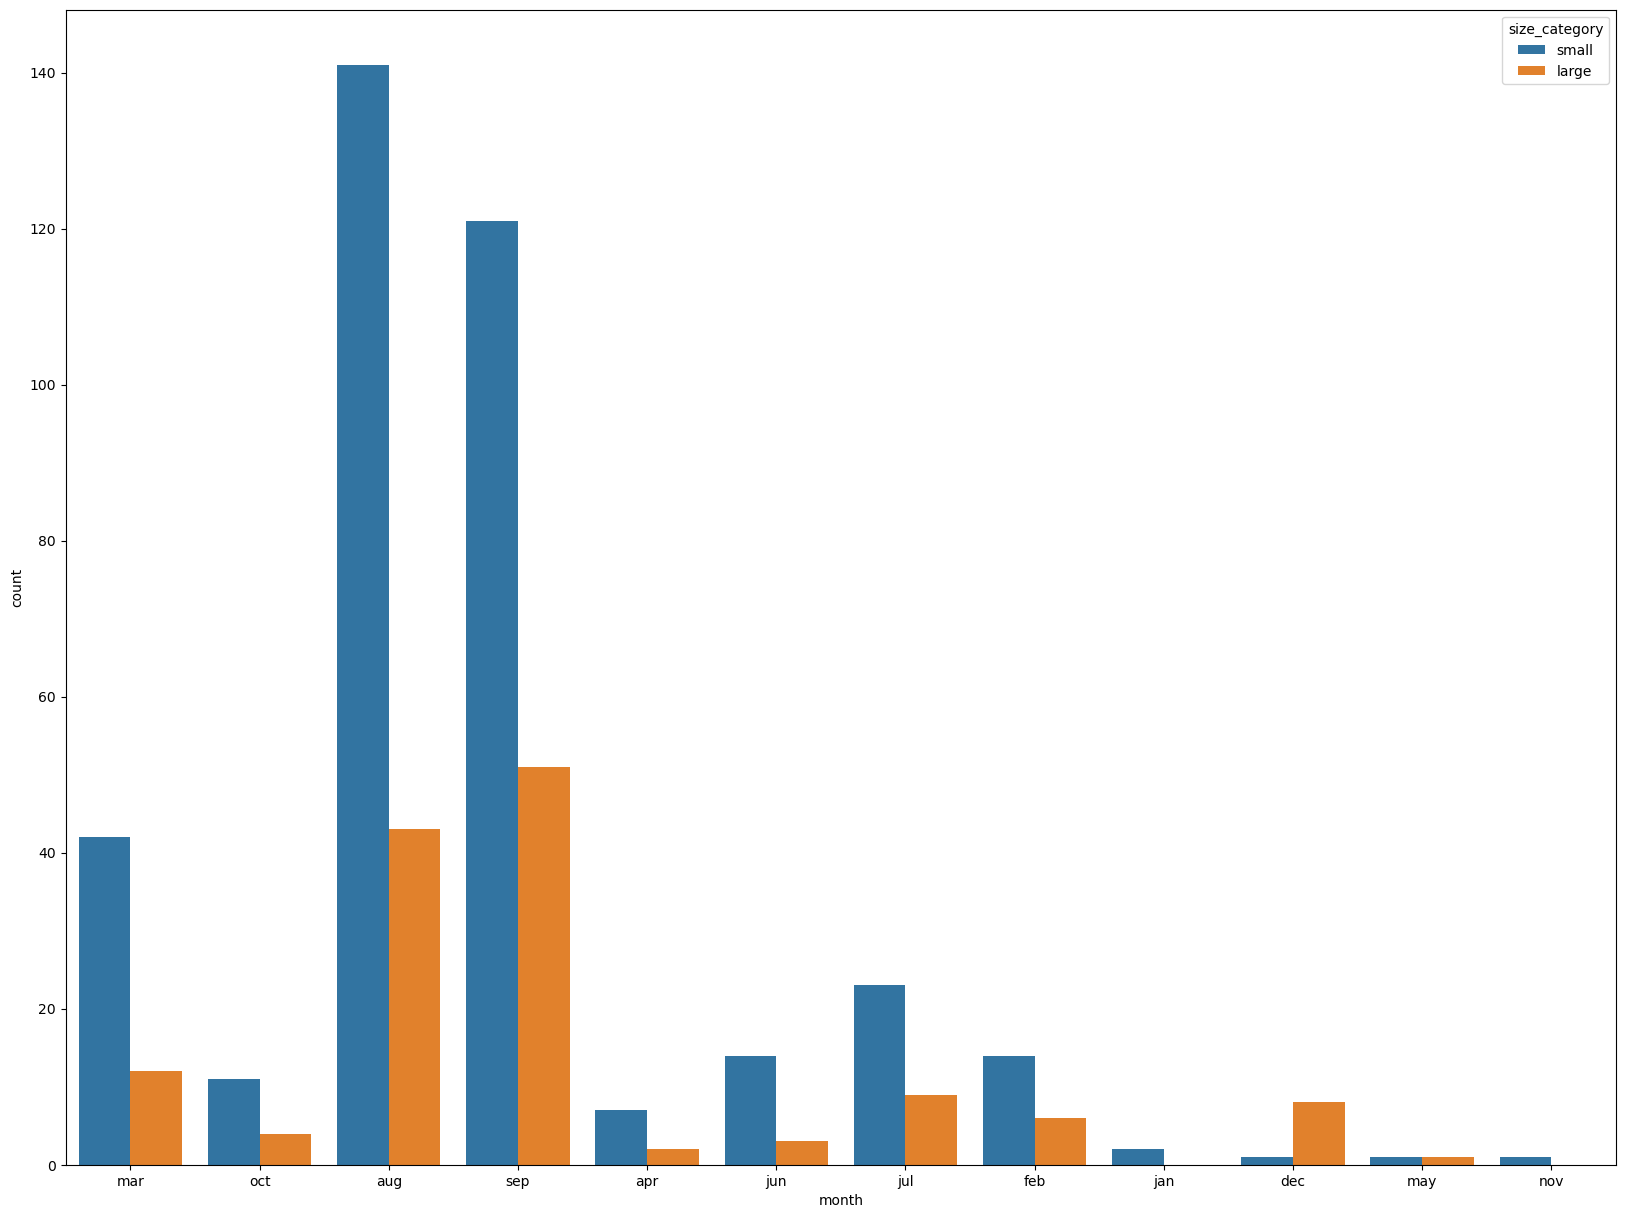

In [12]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x = 'month', hue='size_category')

<Axes: xlabel='day', ylabel='count'>

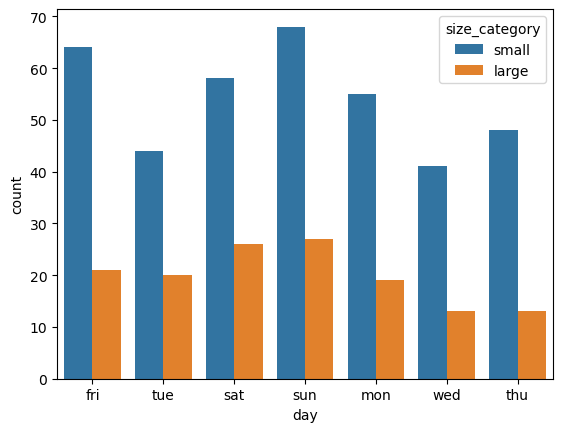

In [8]:
sns.countplot(df, x= 'day', hue='size_category')

C:\Users\Suresh Goud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


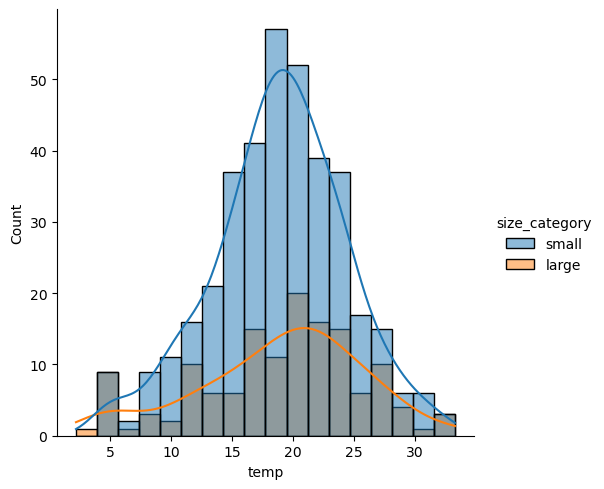

In [22]:
sns.displot(data=df, x = 'temp', kde= True, hue='size_category')

In [20]:
# Percentage for PieChart
percentage = df.size_category.value_counts(normalize=True)*100
percentage

size_category
small    73.11412
large    26.88588
Name: proportion, dtype: float64

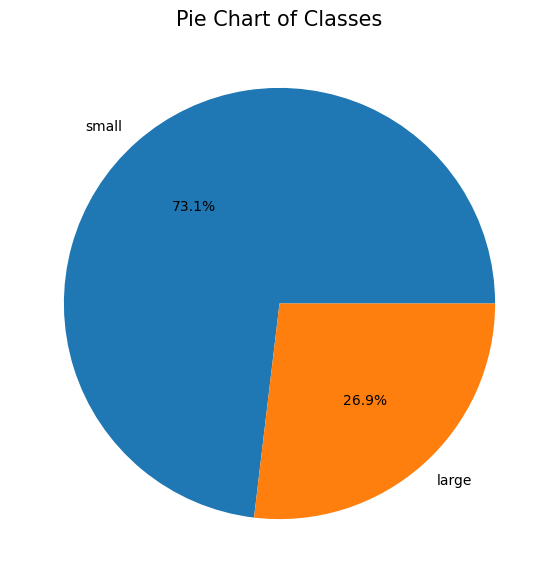

In [21]:
#plotting PieChart
size_category = ["small", "large"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = size_category,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

<Axes: xlabel='RH', ylabel='Count'>

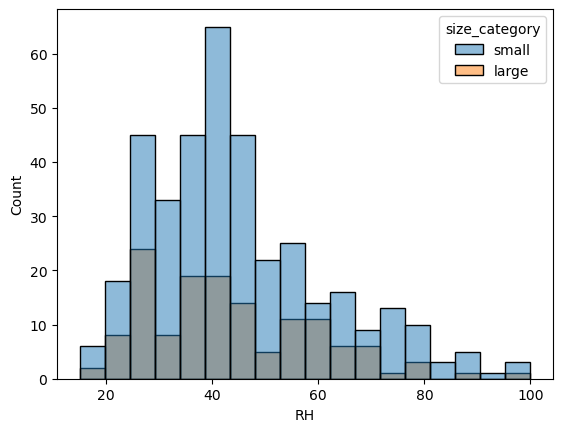

In [23]:
sns.histplot(data=df, x='RH', hue='size_category')

<Axes: xlabel='wind', ylabel='Count'>

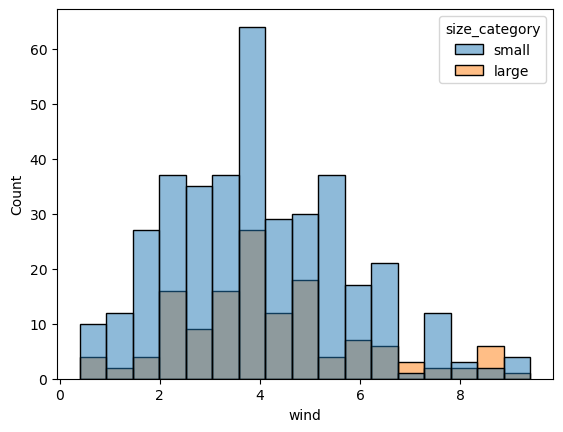

In [41]:
sns.histplot(data=df, x='wind', hue='size_category')

In [ ]:
nurmeric_col = df[['FFMC',
                   'DMC',
                   'DC',
                   'ISI',
                   'temp',
                   'RH',
                   'wind',
                   'rain',
                   'area',]].columns

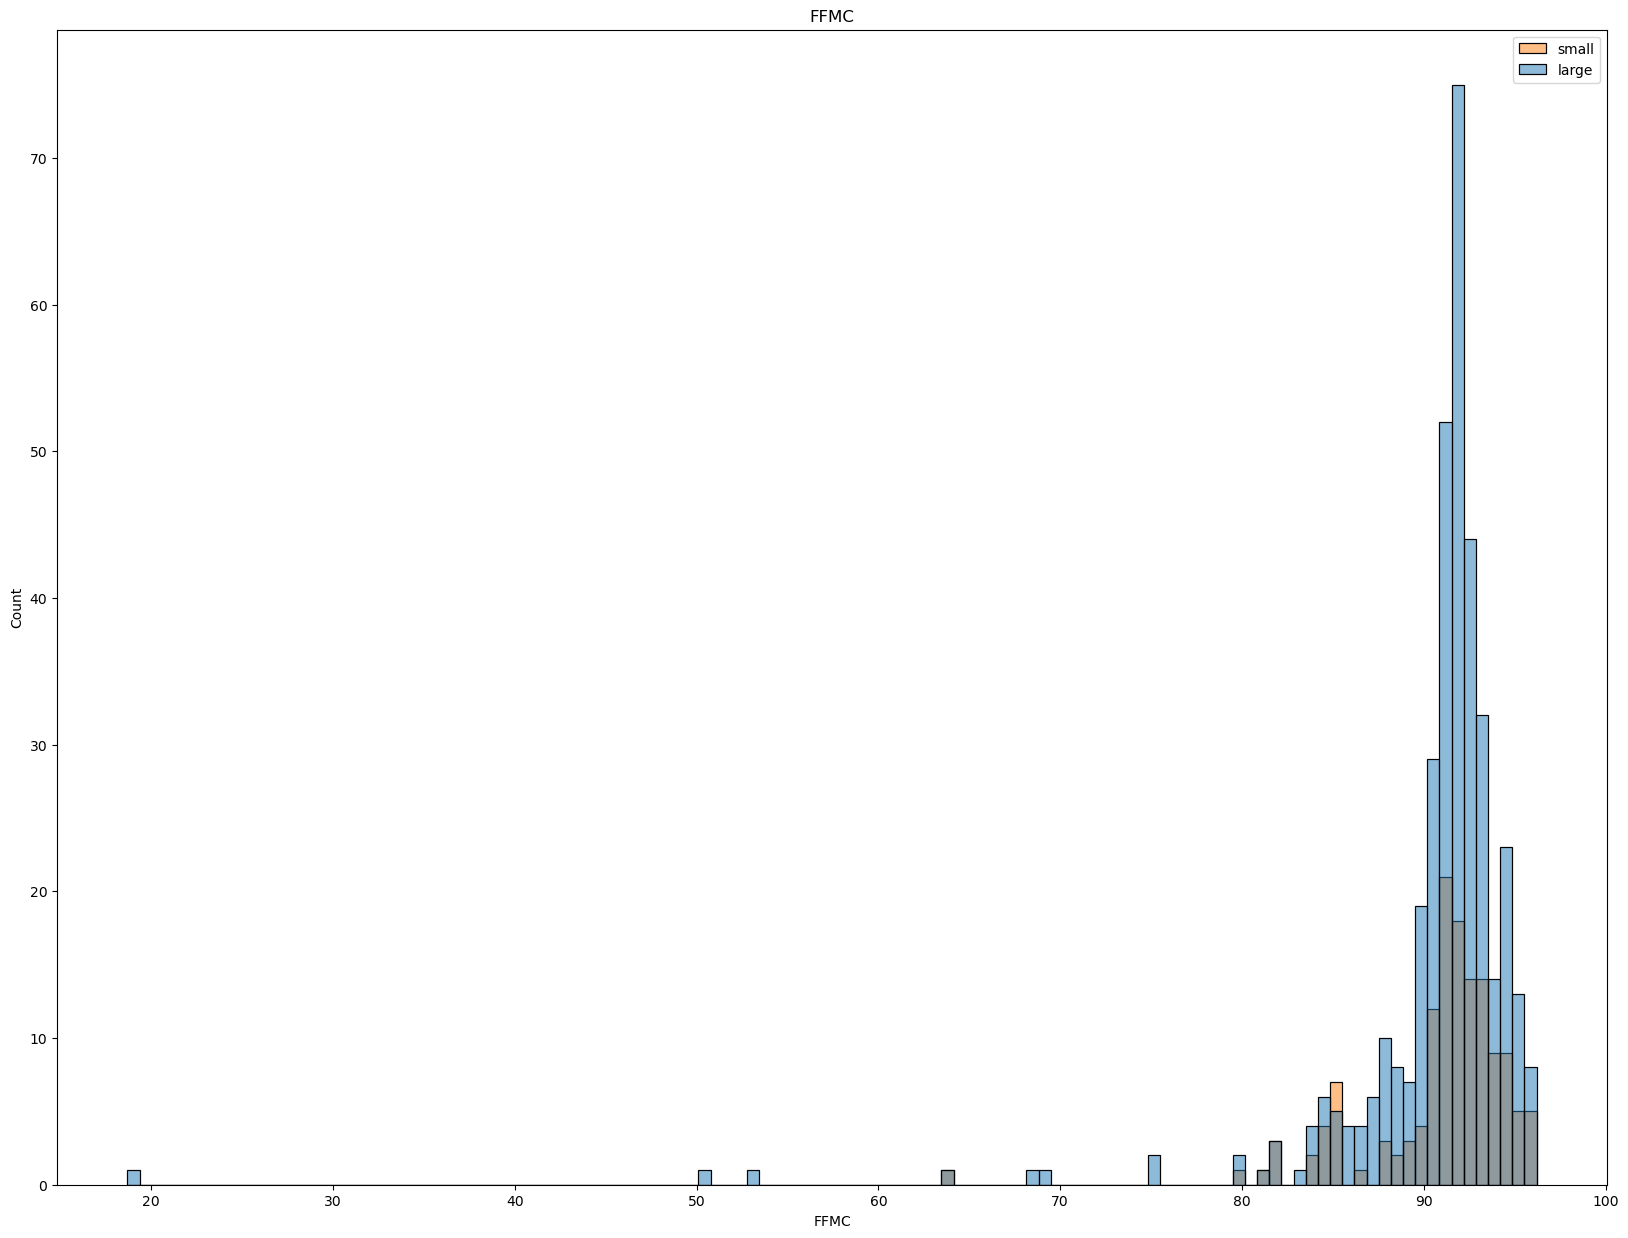

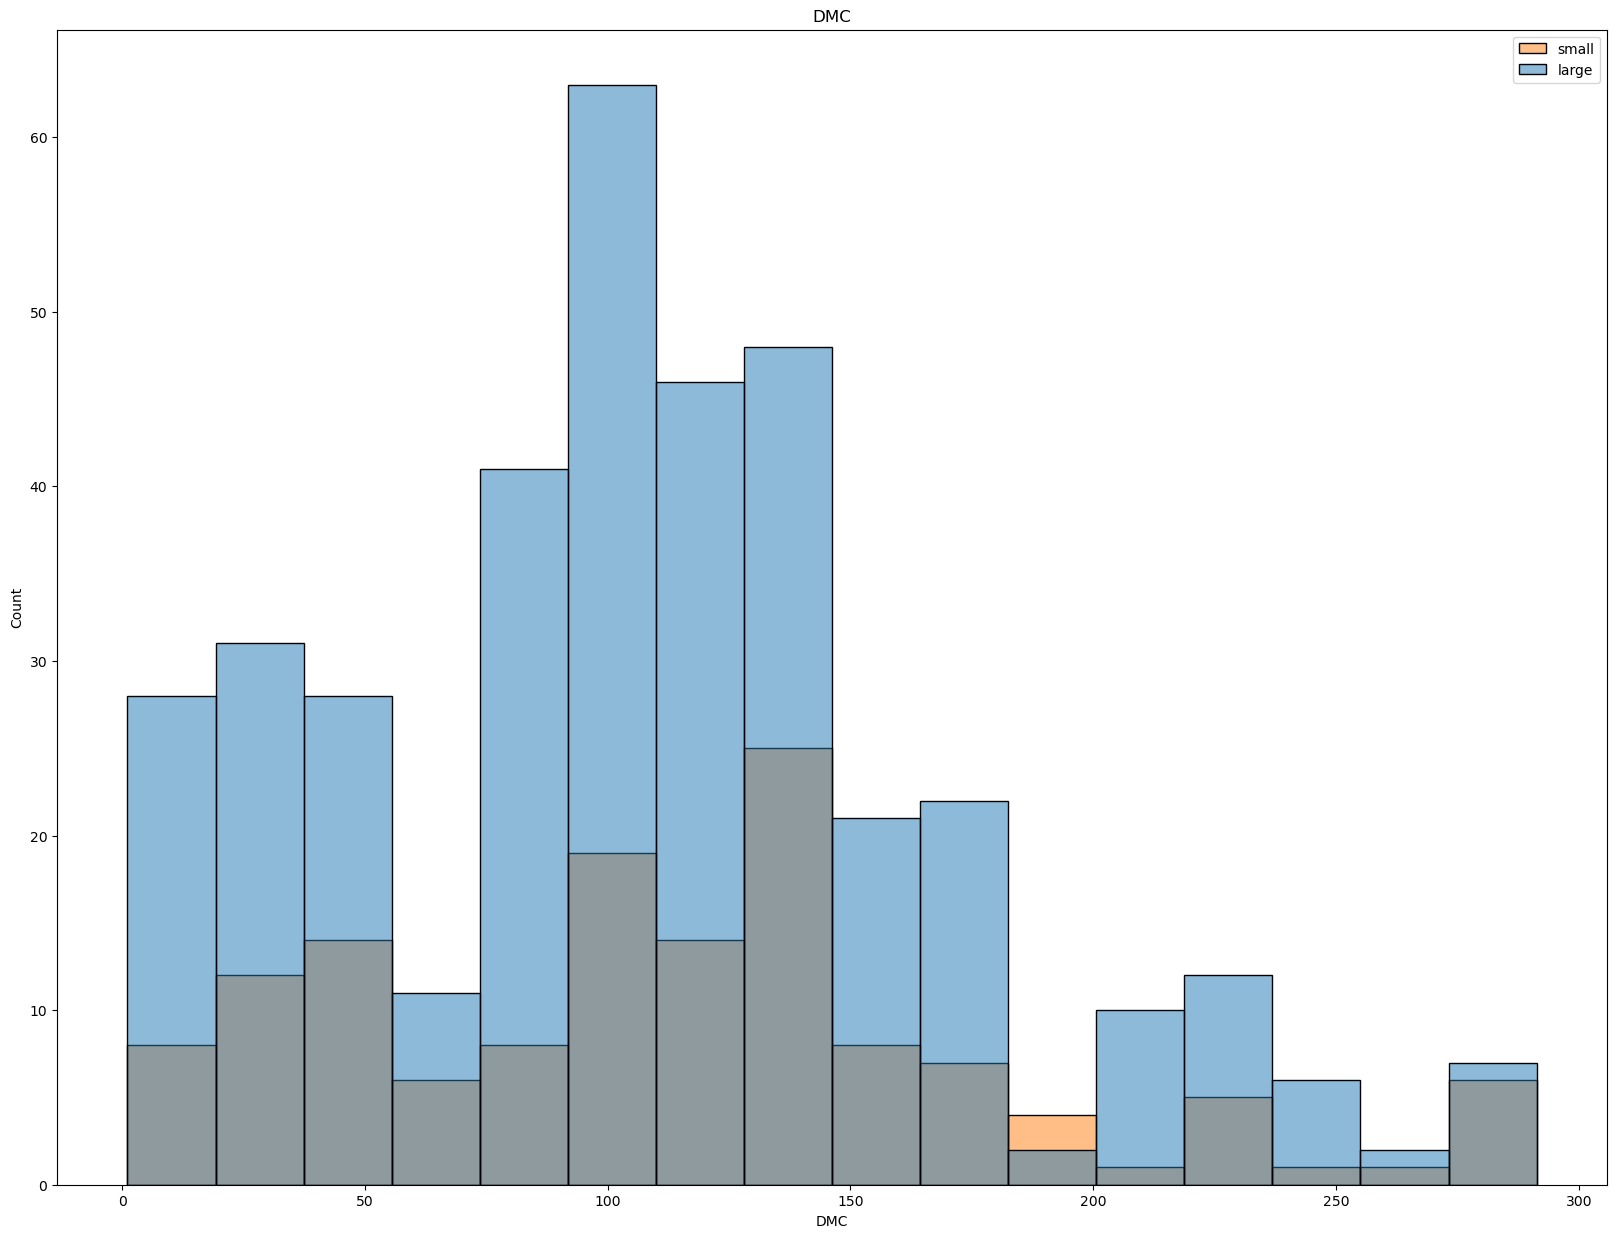

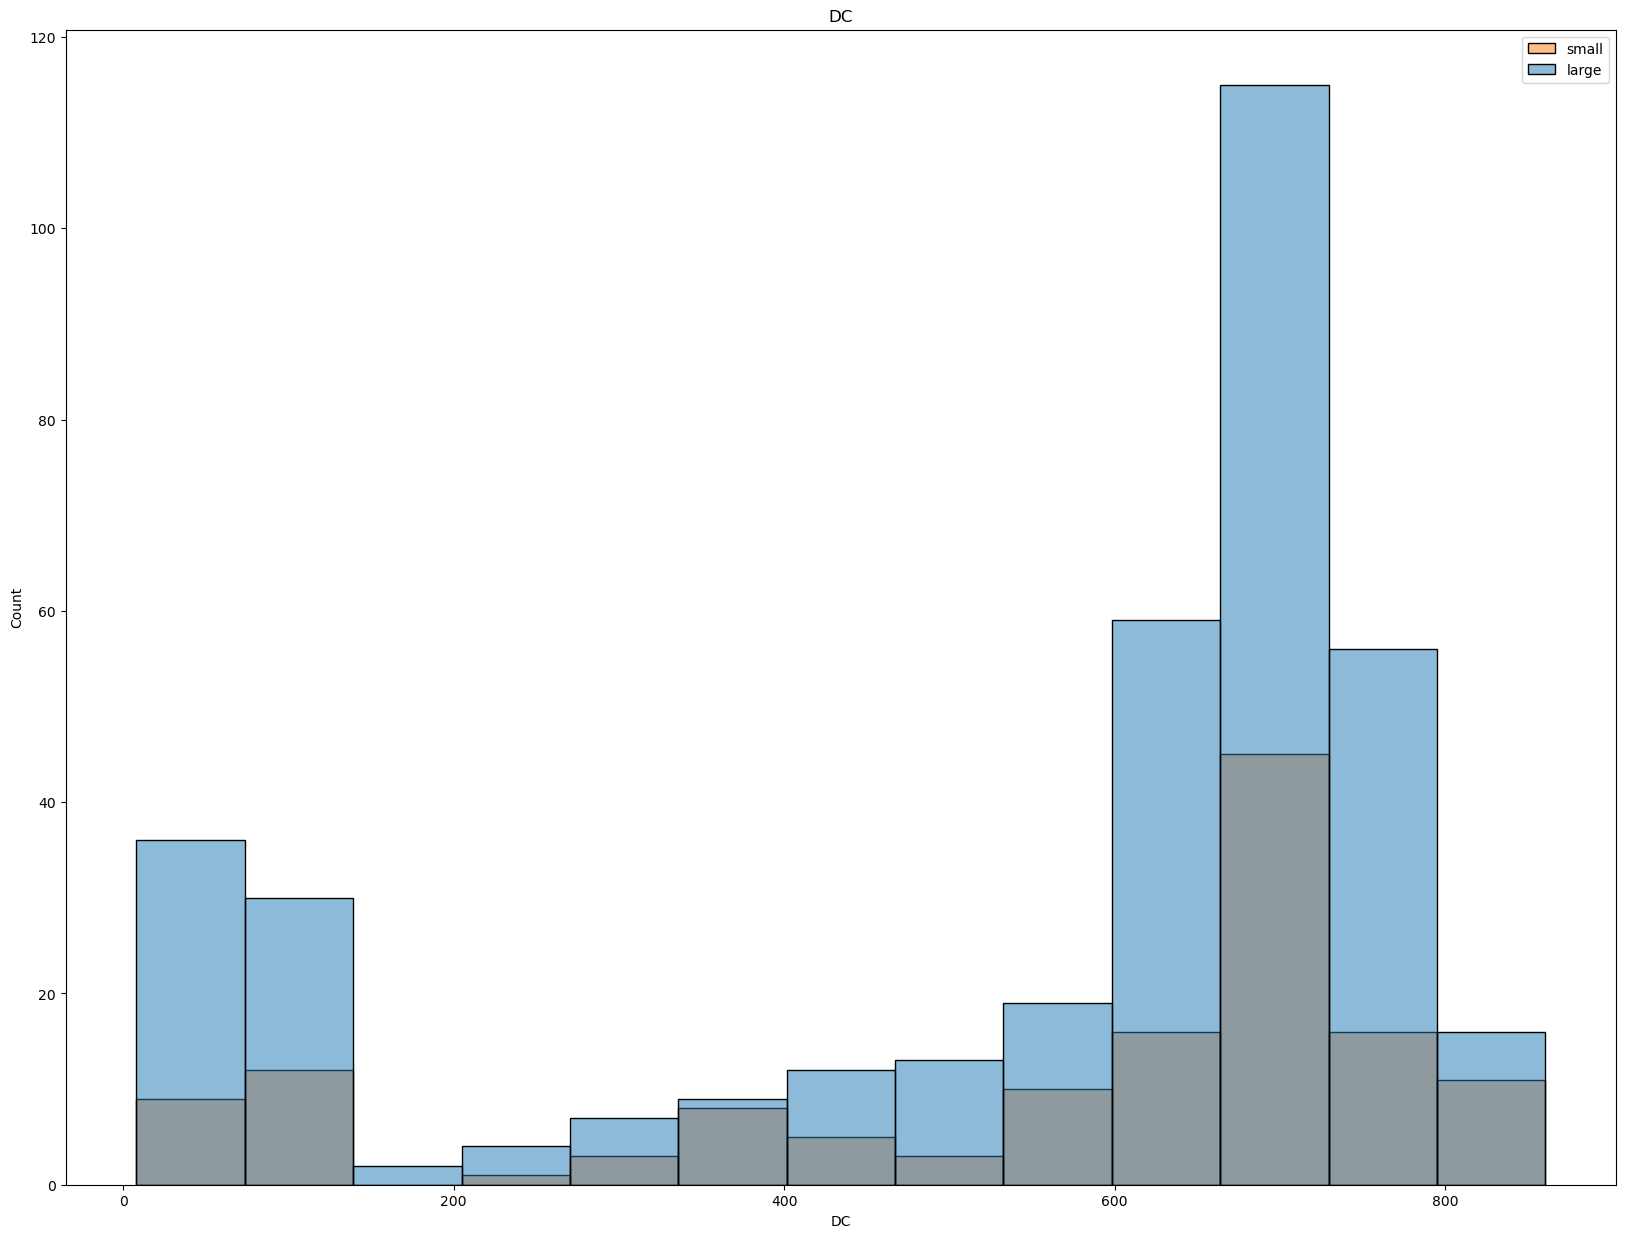

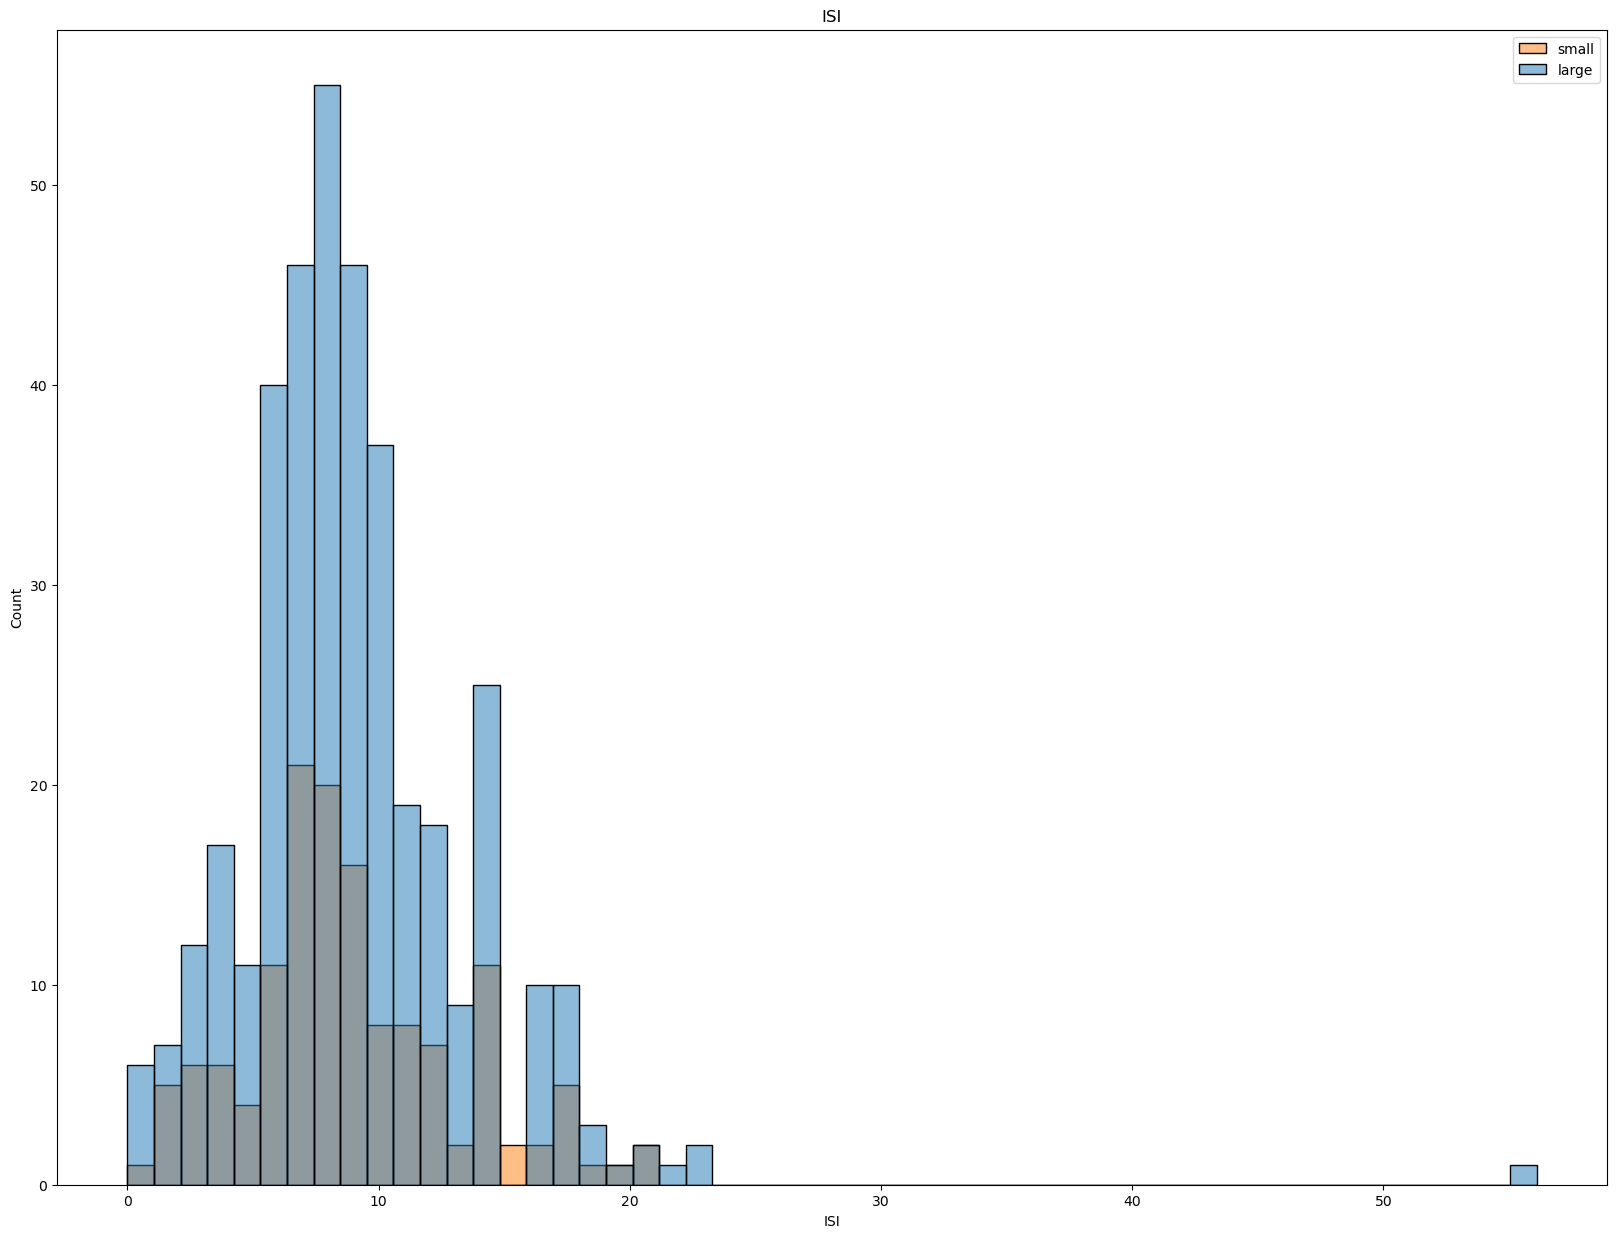

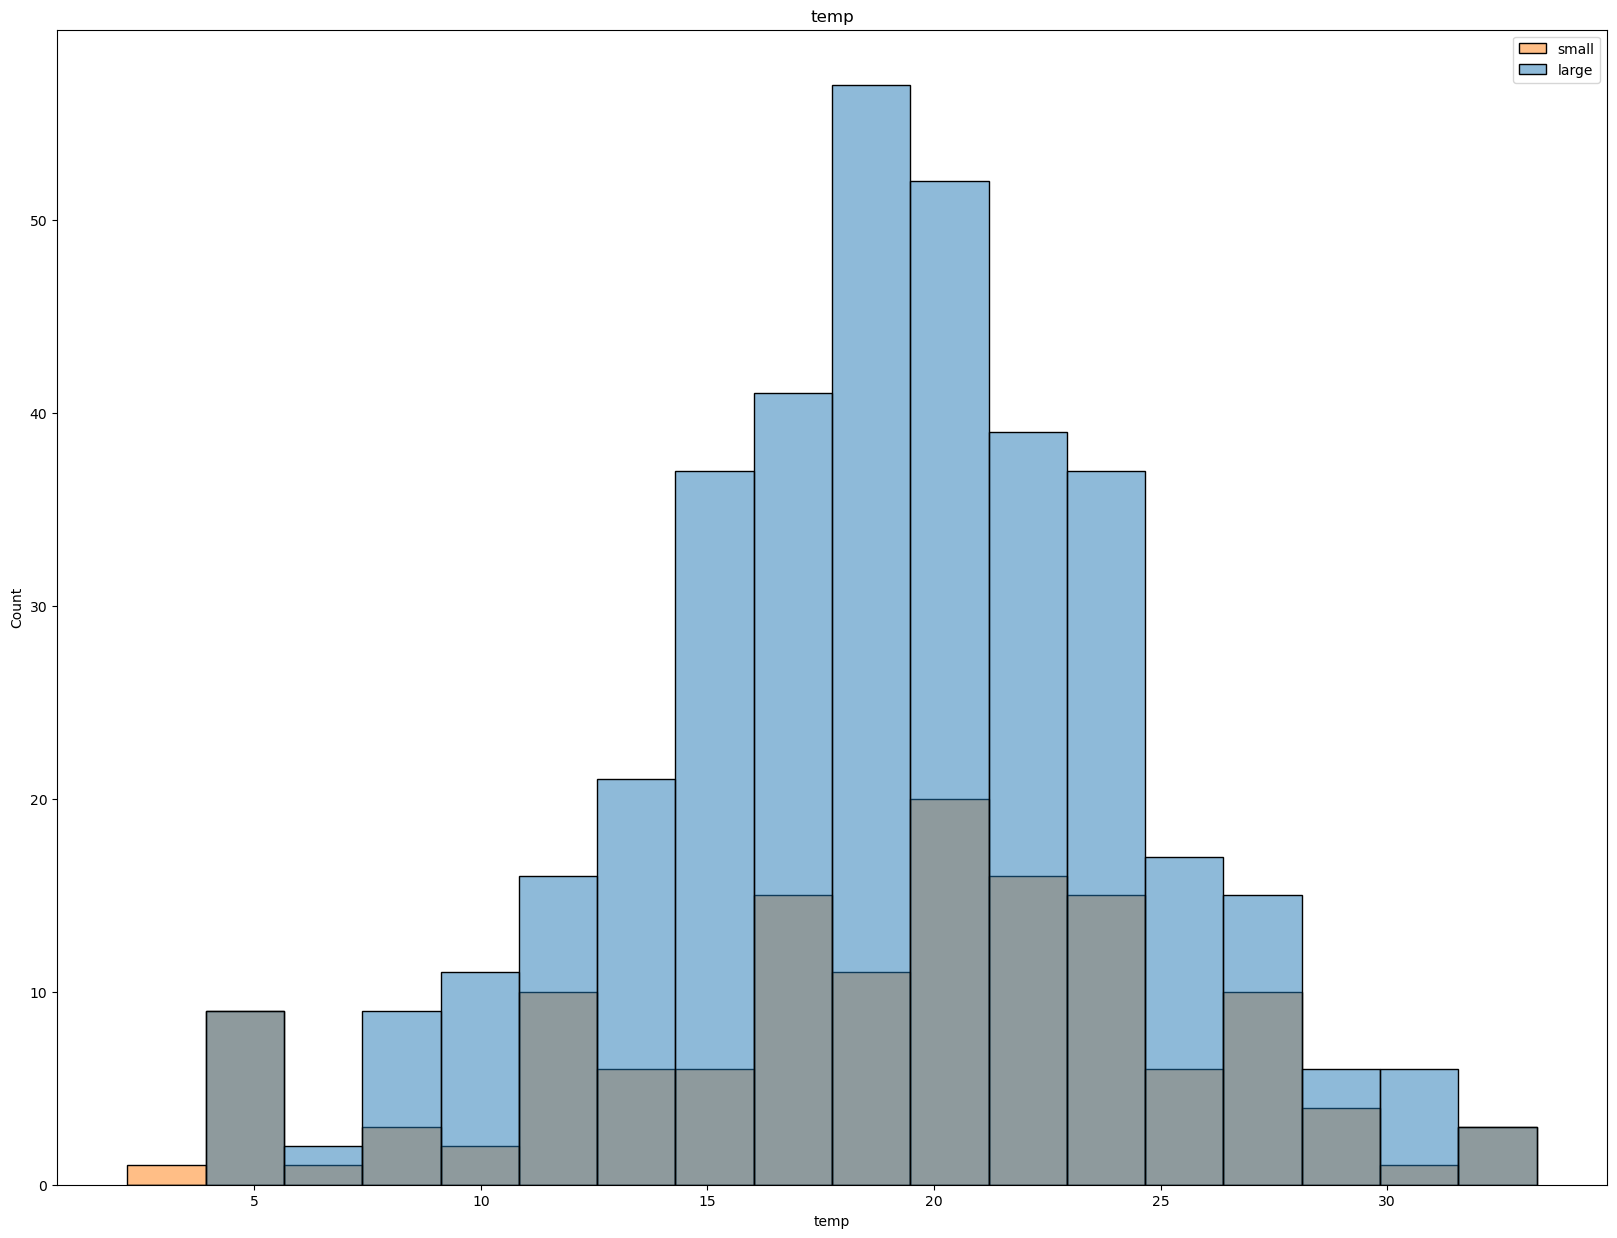

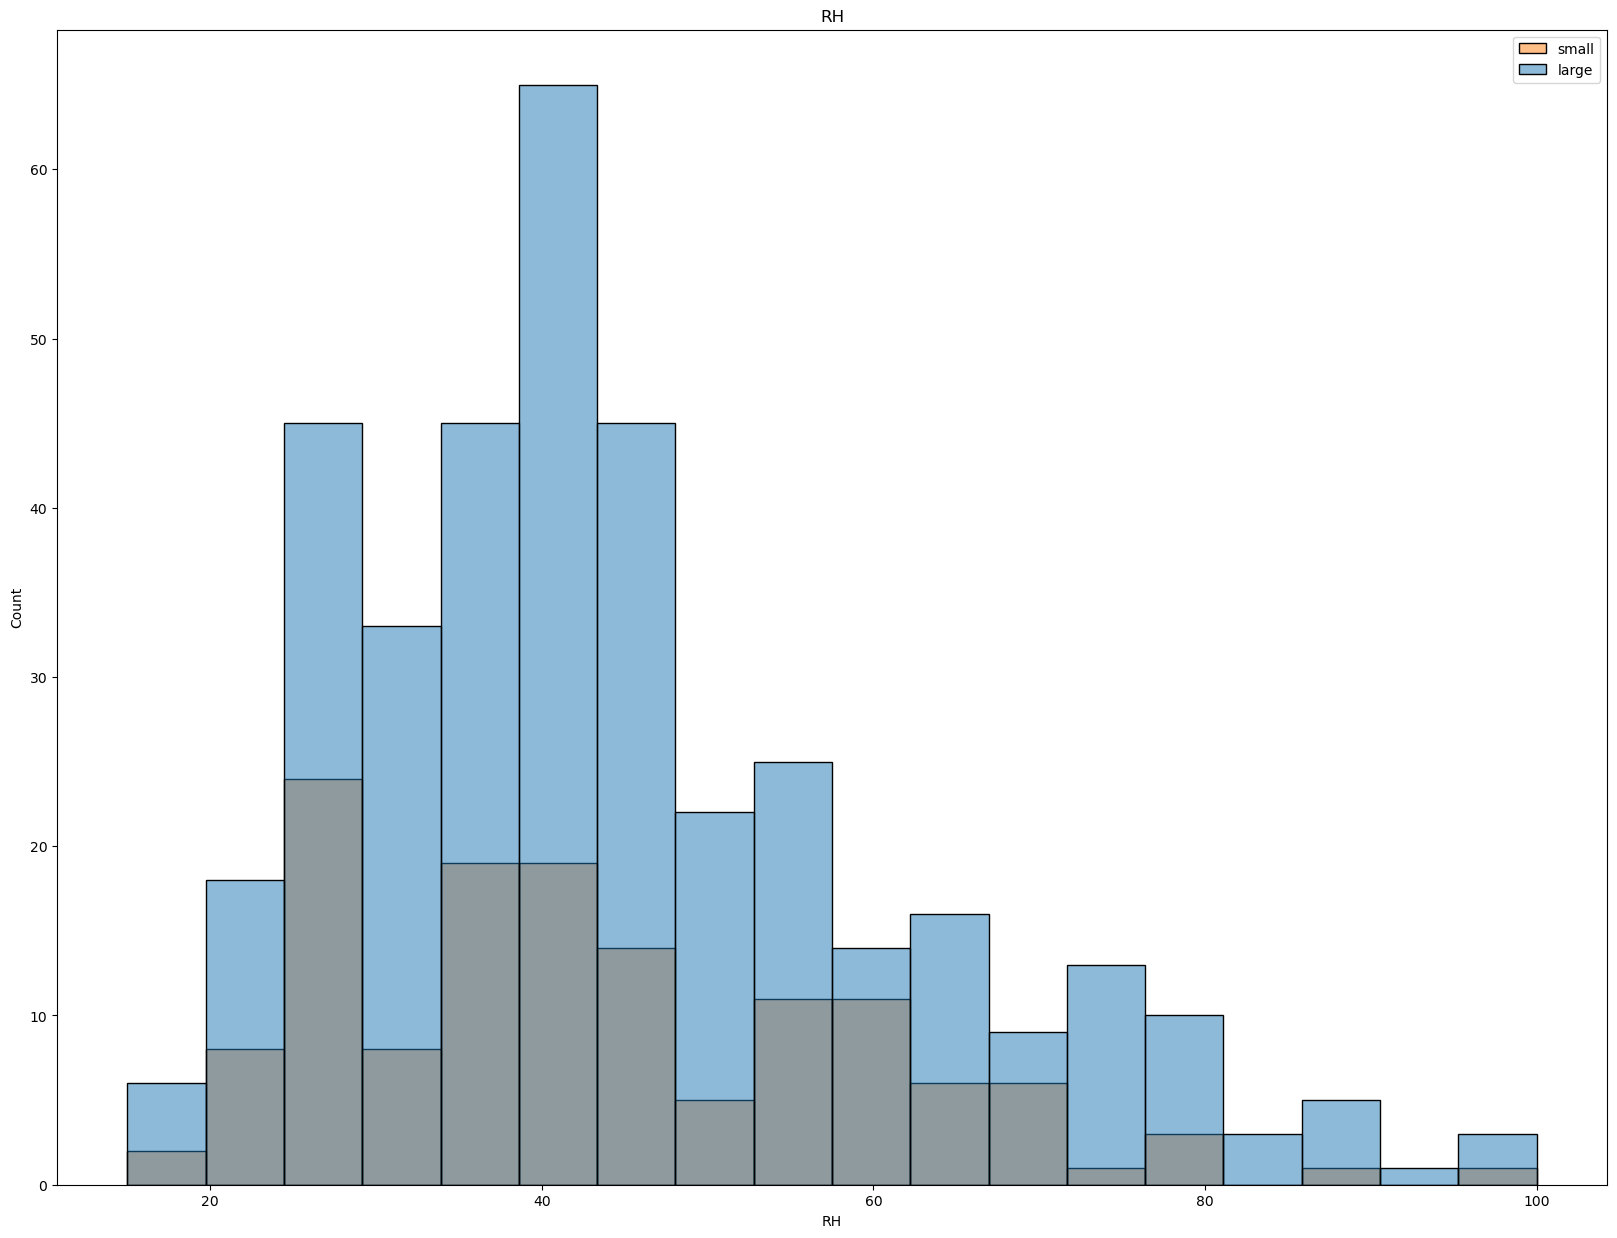

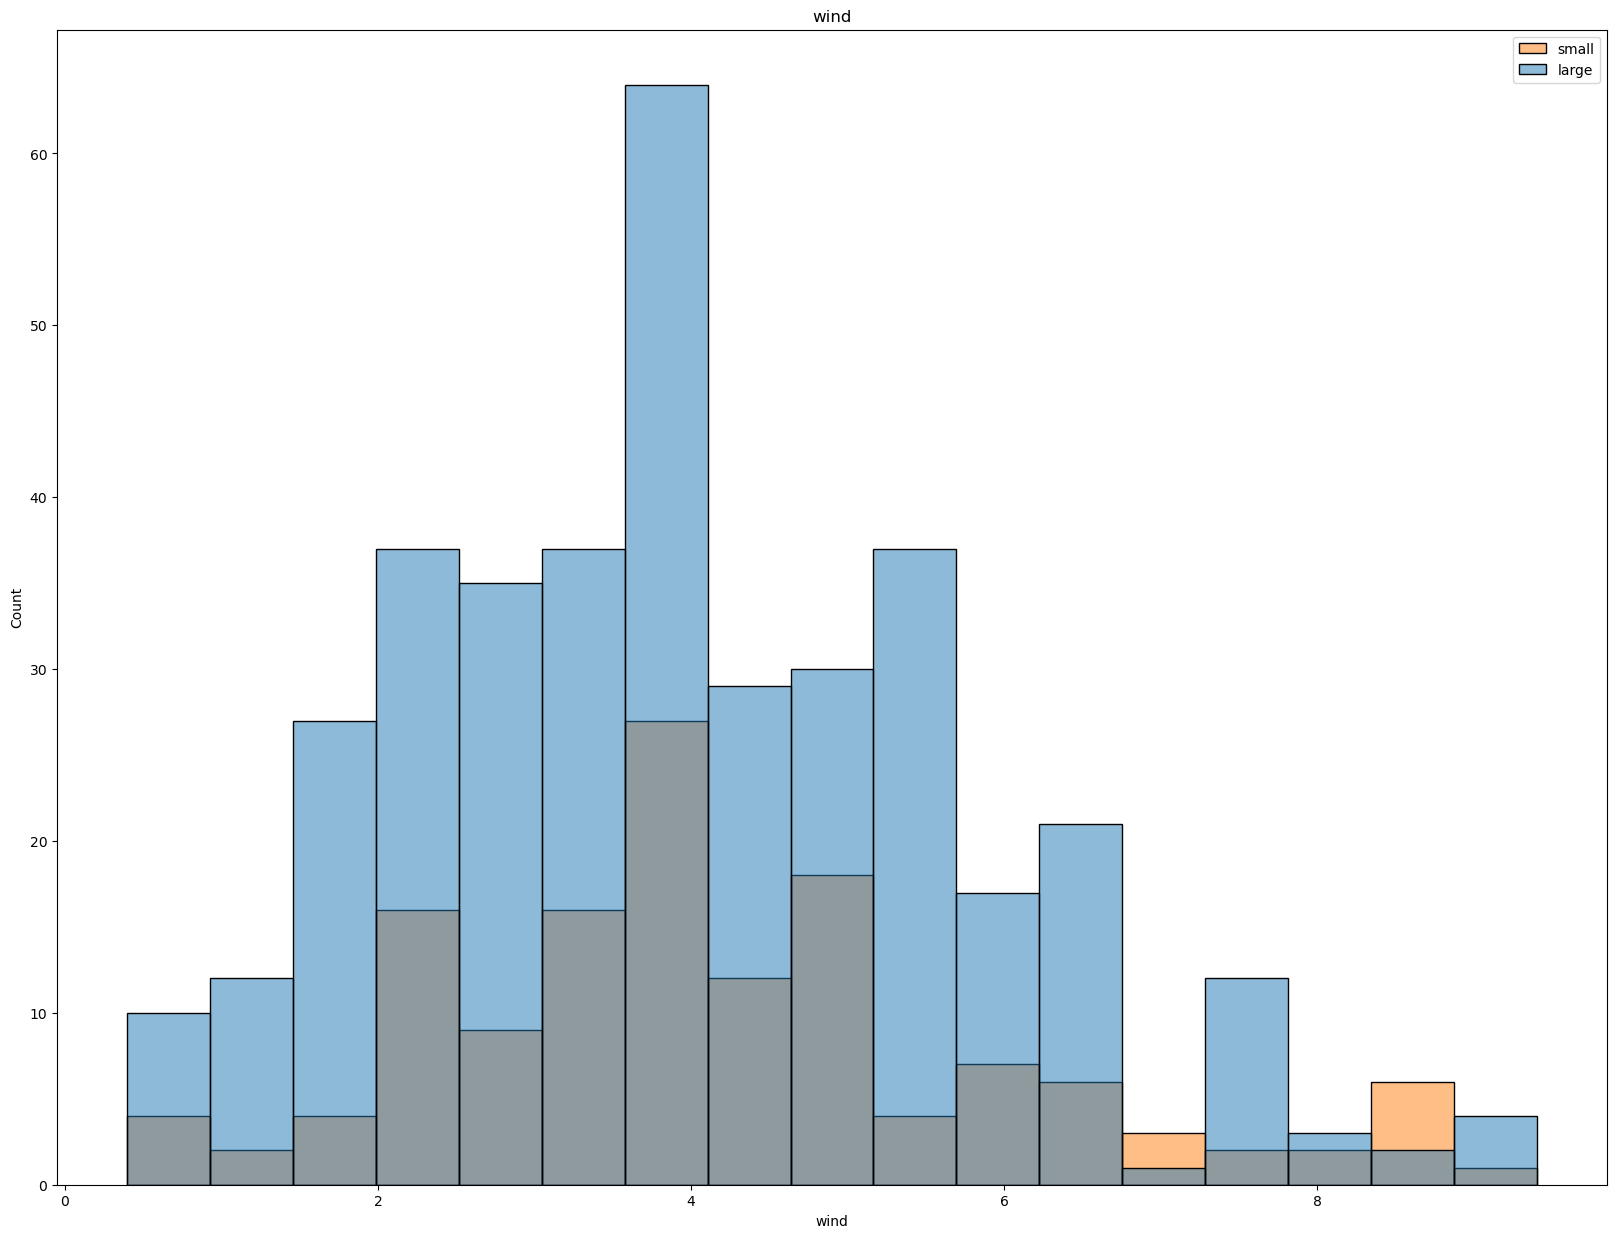

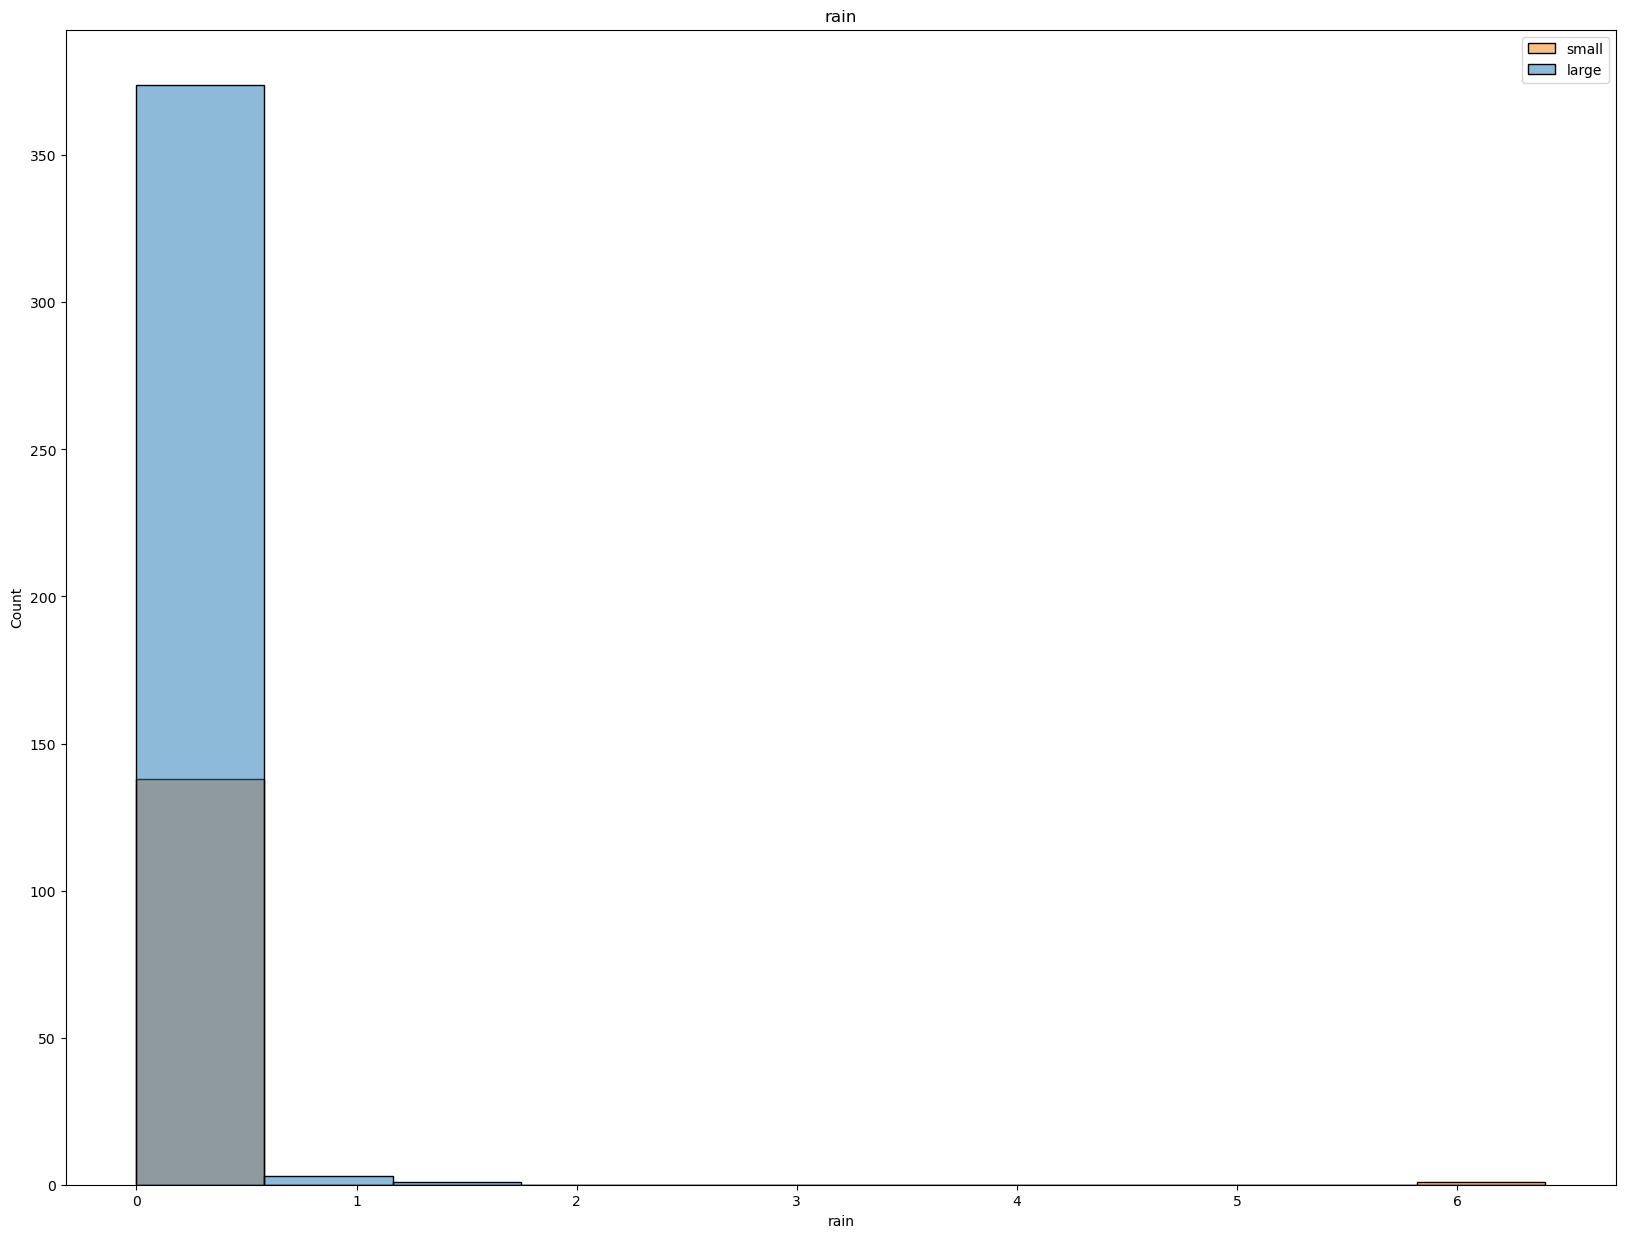

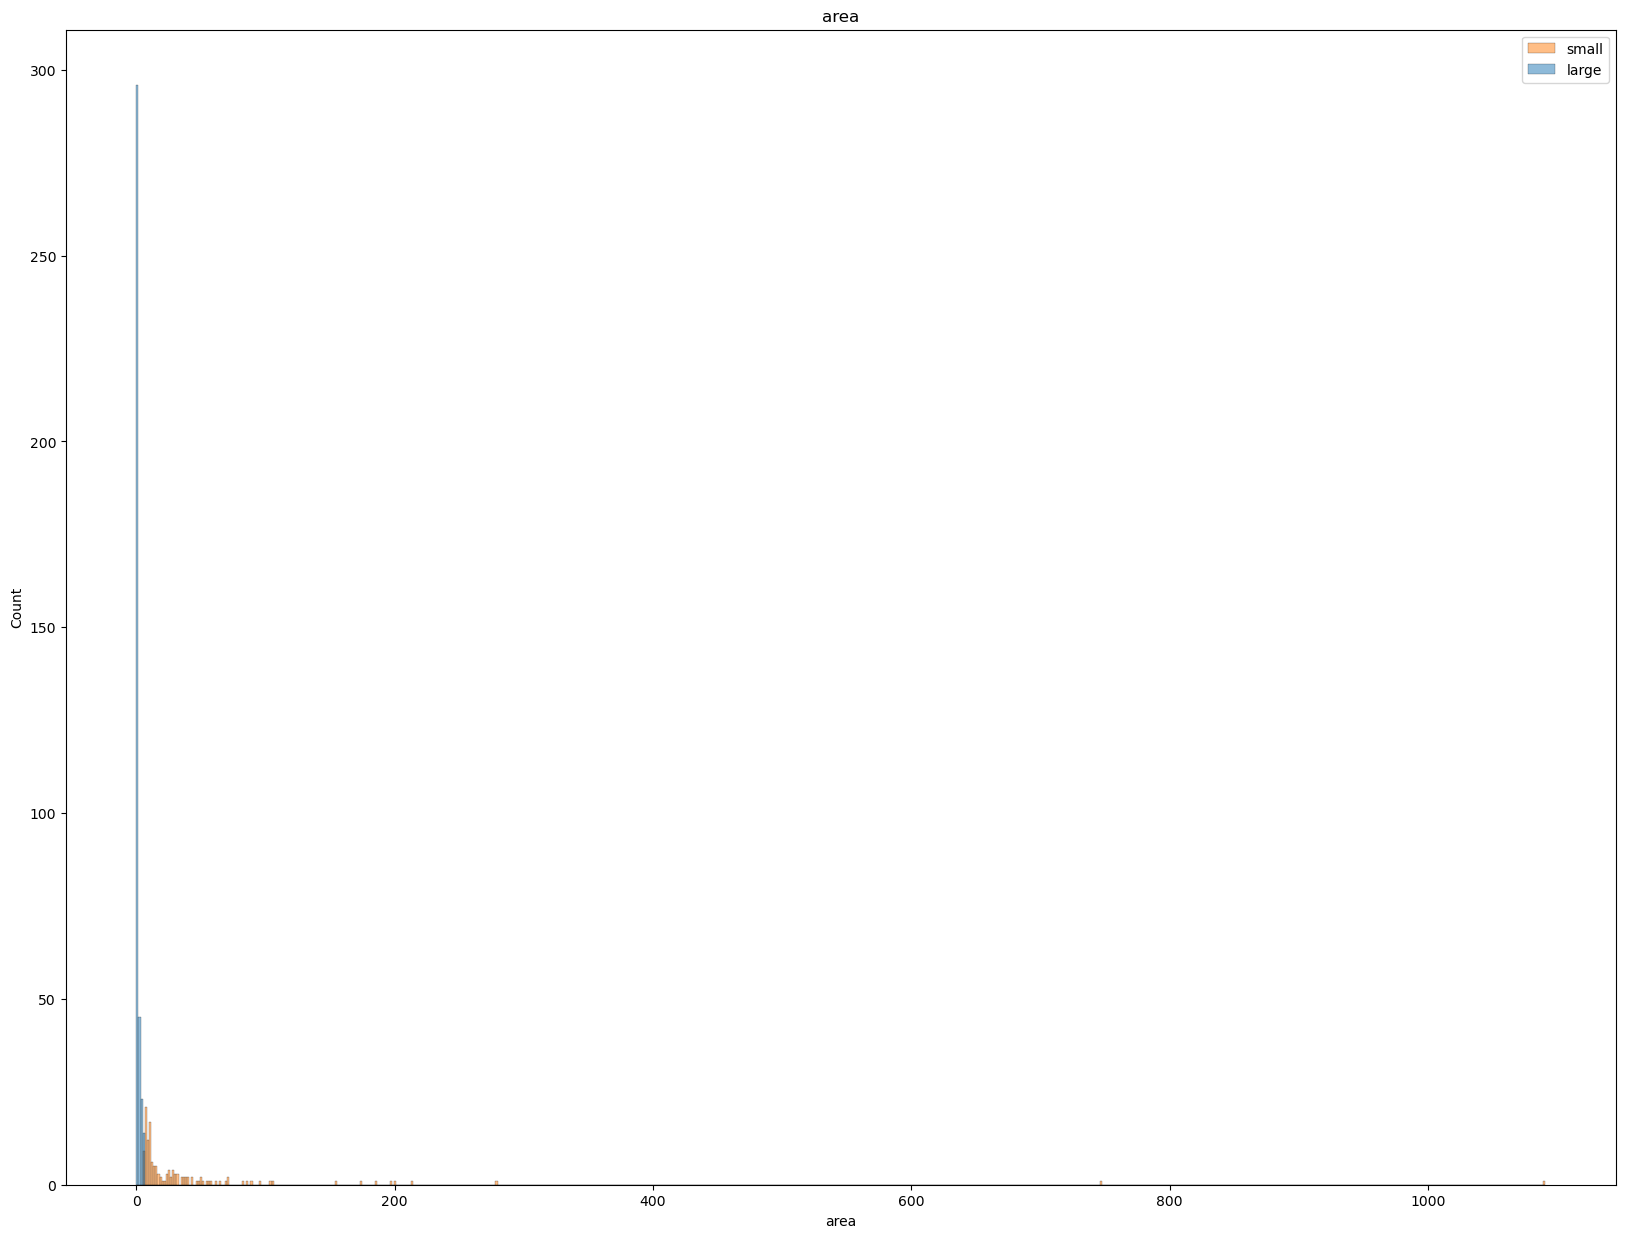

In [43]:
for feature in nurmeric_col:
    plt.figure(figsize=(20,15))
    sns.histplot(data = df,x=feature, hue = 'size_category')
    plt.legend(labels=['small','large'])
    plt.title(feature)
    plt.show()

In [31]:
ncol = [feature for feature in df.columns if df[feature].dtype != 'O']
ncol

['FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area',
 'dayfri',
 'daymon',
 'daysat',
 'daysun',
 'daythu',
 'daytue',
 'daywed',
 'monthapr',
 'monthaug',
 'monthdec',
 'monthfeb',
 'monthjan',
 'monthjul',
 'monthjun',
 'monthmar',
 'monthmay',
 'monthnov',
 'monthoct',
 'monthsep']

In [37]:
nurmeric_col = df[['FFMC',
                   'DMC',
                   'DC',
                   'ISI',
                   'temp',
                   'RH',
                   'wind',
                   'rain',
                   'area',]].columns

In [38]:
nurmeric_col

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')

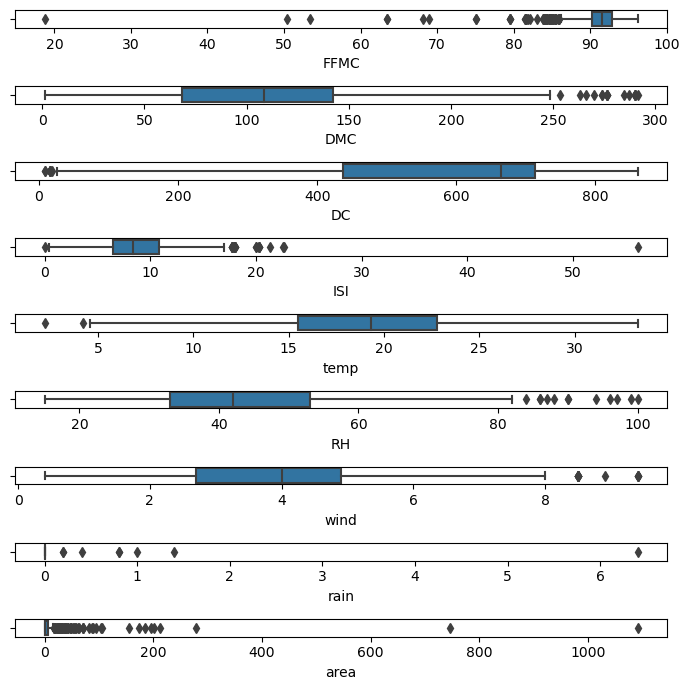

In [39]:
fig, axs = plt.subplots(len(nurmeric_col),1,figsize = (7,7))
i = 0

for var in nurmeric_col:
    sns.boxplot(df, x = var, ax = axs[i])
    i += 1
    
plt.tight_layout()

## Feature Engineering

In [44]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [45]:
df.drop(columns=['month', 'day'], axis= 1, inplace=True)

In [46]:
df.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [47]:
df['size_category'] = np.where(df['size_category'] =='small', 0, 1)


In [48]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
df.size_category.value_counts()

size_category
0    378
1    139
Name: count, dtype: int64

## Model preparation

In [50]:
df.shape

(517, 29)

In [152]:
x = df.iloc[:,:28]
y = df.iloc[:,[28]]

In [153]:
## splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [112]:
xtrain.shape, xtest.shape

((361, 28), (156, 28))

In [63]:
xtrain.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
311,92.4,105.8,758.1,9.9,24.8,28,1.8,0.0,14.29,0,...,0,0,0,0,0,0,0,0,0,1
368,91.2,94.3,744.4,8.4,16.8,47,4.9,0.0,12.64,0,...,0,0,0,0,0,0,0,0,0,1
23,90.2,110.9,537.4,6.2,19.5,43,5.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
271,92.1,152.6,658.2,14.3,20.1,58,4.5,0.0,9.27,0,...,0,0,0,0,0,0,0,0,0,0
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
xtrains = scaler.fit_transform(xtrain)
xtests = scaler.transform(xtest)

In [154]:
ytrain

,size_category
311,1
368,1
23,0
271,1
299,0
...,...
71,0
106,0
270,0
435,0


C:\Temp\ipykernel_9912\3708417771.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

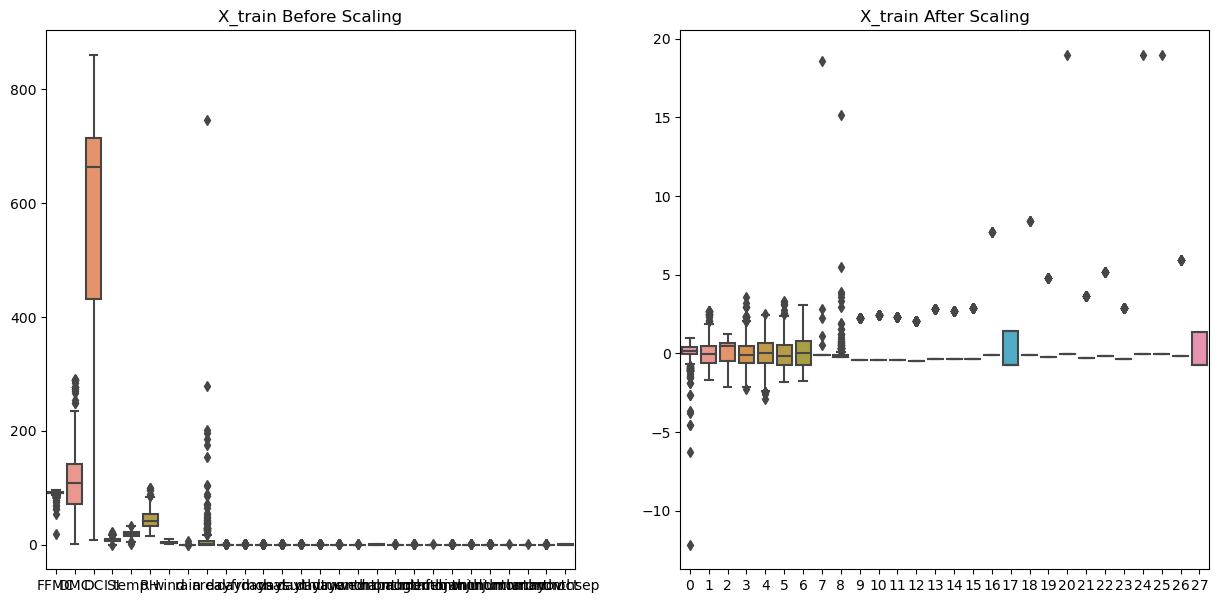

In [88]:

plt.subplots(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.boxplot(data=xtrain)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=xtrains)
plt.title('X_train After Scaling')

In [68]:
import keras
import scikeras
import tensorflow


In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras import optimizers
from scikeras.wrappers import KerasClassifier

In [158]:
# Function to create Keras model
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=28 ,activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [159]:
# Create KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=1)

In [160]:
# Fit the model
keras_model.fit(xtrains, ytrain)



C:\Users\Suresh Goud\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50
37/37 [==============================] - 4s 12ms/step - loss: 0.6371 - accuracy: 0.6981
Epoch 2/50
37/37 [==============================] - 0s 8ms/step - loss: 0.5810 - accuracy: 0.7285
Epoch 3/50
37/37 [==============================] - 0s 8ms/step - loss: 0.5506 - accuracy: 0.7285
Epoch 4/50
37/37 [==============================] - 0s 7ms/step - loss: 0.5288 - accuracy: 0.7507
Epoch 5/50
37/37 [==============================] - 0s 9ms/step - loss: 0.5090 - accuracy: 0.7479
Epoch 6/50
37/37 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.7673
Epoch 7/50
37/37 [==============================] - 0s 8ms/step - loss: 0.4698 - accuracy: 0.7839
Epoch 8/50
37/37 [==============================] - 0s 8ms/step - loss: 0.4510 - accuracy: 0.7867
Epoch 9/50
37/37 [==============================] - 0s 8ms/step - loss: 0.4338 - accuracy: 0.7922
Epoch 10/50
37/37 [==============================] - 0s 8ms/step - loss: 0.4159 - accuracy: 0.8089
Epoch 11/50
37/37 

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x000002959C29C0E0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

# Evaluate the model

In [161]:
# Evaluate the model
accuracy = keras_model.score(xtests, ytest)
print("Test Accuracy:", accuracy)

16/16 [==============================] - 5s 27ms/step
Test Accuracy: 0.8910256410256411


In [163]:
accuracy = keras_model.score(xtrains, ytrain)
print("train Accuracy:", accuracy)

37/37 [==============================] - 0s 5ms/step
train Accuracy: 0.997229916897507


In [165]:
ypred = keras_model.predict(xtests)
print(ypred)

16/16 [==============================] - 0s 3ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [168]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [169]:
score = accuracy_score(ytest, ypred)
score

0.8910256410256411

In [171]:
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.85      0.71      0.77        41

    accuracy                           0.89       156
   macro avg       0.88      0.83      0.85       156
weighted avg       0.89      0.89      0.89       156



In [172]:
cm = confusion_matrix(ytest, ypred)
cm

array([[110,   5],
       [ 12,  29]], dtype=int64)

In [ ]:
### try this model also

In [176]:
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim=28 , activation= 'relu' ))
    model.add(Dense(8, activation= 'relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
    return model

    

In [177]:
# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)


In [178]:
model.fit(xtrains, ytrain)

C:\Users\Suresh Goud\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


KerasClassifier(
	model=None
	build_fn=<function create_model at 0x000002959D1AF4C0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [179]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 28))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [180]:
classifier.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 10)                290       
                                                                 
 dense_71 (Dense)            (None, 10)                110       
                                                                 
 dense_72 (Dense)            (None, 1)                 11        
                                                                 
Total params: 411 (1.61 KB)
Trainable params: 411 (1.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
# Fitting the ANN to the Training set
model_history=classifier.fit(xtrains, ytrain,validation_split=0.33, batch_size = 100,epochs = 100)#,callbacks = [histories])

Epoch 1/100
3/3 [==============================] - 4s 490ms/step - loss: 1.3830 - accuracy: 0.3154 - val_loss: 1.3768 - val_accuracy: 0.2917
Epoch 2/100
3/3 [==============================] - 0s 79ms/step - loss: 1.3277 - accuracy: 0.3195 - val_loss: 1.3300 - val_accuracy: 0.3083
Epoch 3/100
3/3 [==============================] - 0s 102ms/step - loss: 1.2789 - accuracy: 0.3154 - val_loss: 1.2855 - val_accuracy: 0.3083
Epoch 4/100
3/3 [==============================] - 0s 82ms/step - loss: 1.2295 - accuracy: 0.3195 - val_loss: 1.2431 - val_accuracy: 0.3250
Epoch 5/100
3/3 [==============================] - 0s 120ms/step - loss: 1.1841 - accuracy: 0.3237 - val_loss: 1.2027 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 81ms/step - loss: 1.1385 - accuracy: 0.3278 - val_loss: 1.1643 - val_accuracy: 0.3500
Epoch 7/100
3/3 [==============================] - 0s 90ms/step - loss: 1.0984 - accuracy: 0.3402 - val_loss: 1.1272 - val_accuracy: 0.3417
Epoch 8/100
3/3 [